Source of the image :=> http://www.pivchallenge.org/pub05/ (Case C the 3rd and the 5th image in the downloaded folder) The images used are c001a.bmp and c002a.bmp.
winsize and searchsize was selected to be powers of 2 for faster processing. Greater than searchsize of 64 was not producing results 

overlap of 25 produces vectors that most accurately represents actual fluid motion in the image set. The vectors produced by overlap value less than 25 and more than 25 did not represent correct fluid motion

dt = 0.0002 since it is given on the website that "time interval between 001a and 002a is 200 micro-s."

Other values were tried for threshhold, max_iter, kernel_size,scaling_factor, scale and width, by trial and error. However, the combination of the given values gave the most accurate representation of velocity vectors (on comparing with actual fluid motion). 

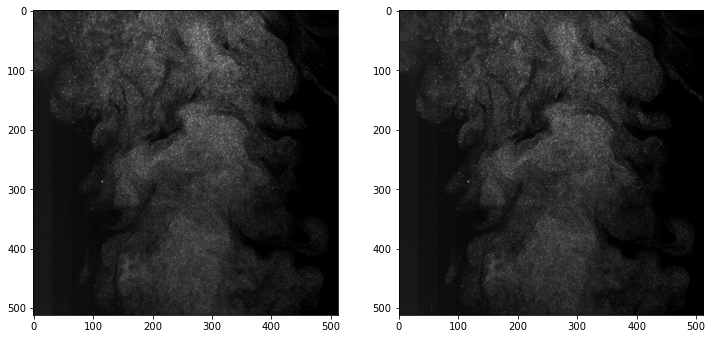

In [1]:
from openpiv import tools, pyprocess, validation, filters, scaling 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

try:
    frame_a  = tools.imread( '/home/antariksh/Downloads/C/c001a.bmp' )
    frame_b  = tools.imread( '/home/antariksh/Downloads/C/c002a.bmp' )
except:
    frame_a  = tools.imread( '/home/user/Downloads/Jet_PIV_Challenge_Case_C/c001a.bmp' )
    frame_b  = tools.imread( '/home/user/Downloads/Jet_PIV_Challenge_Case_C/c001b.bmp' )



fig,ax = plt.subplots(1,2,figsize=(12,10))
ax[0].imshow(frame_a,cmap=plt.cm.gray)
ax[1].imshow(frame_b,cmap=plt.cm.gray)

In [2]:
winsize = 64
searchsize= 64
overlap = 32
dt = 1 # sec


u0, v0, sig2noise = pyprocess.extended_search_area_piv(frame_a, 
                                                       frame_b,
                                                       window_size=winsize, 
                                                       overlap=overlap, 
                                                       dt=dt, 
                                                       search_area_size=searchsize, 
                                                       sig2noise_method='peak2peak',
                                                       correlation_method='linear',
                                                       normalized_correlation=False)
# OpenPIV function responsible for convultaional analysis of the entire image using a search window


x, y = pyprocess.get_coordinates(image_size=frame_a.shape, 
                                 search_area_size=searchsize,
                                 overlap=overlap )
# OpenPIV module that finds the center of the interrogation window

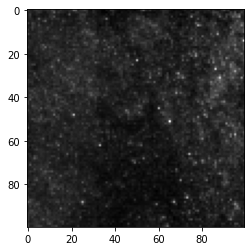

In [3]:
plt.imshow(frame_a[:100,:100],cmap=plt.cm.gray)

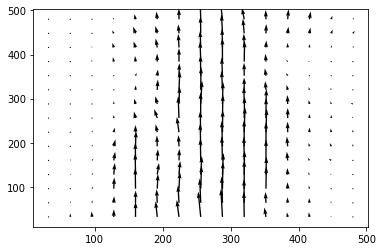

In [12]:
plt.quiver(x,y,u0,-v0,scale=10)

In [5]:
u1, v1, mask = validation.sig2noise_val( u0, v0, sig2noise, threshold = 1.0)
# OpenPIV module that replaces fake vectors with 0 if below a certain threshhold

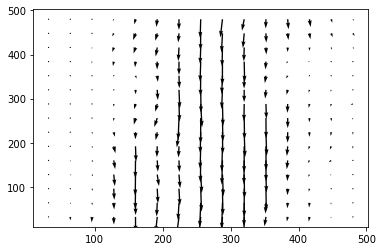

In [6]:
plt.quiver(x,y,u1,-v1,scale=10)

In [7]:
u2, v2 = filters.replace_outliers( u1,v1,method='localmean', max_iter=5,
                                kernel_size = 2)

/home/user/miniconda3/envs/jet-analysis-module/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/user/miniconda3/envs/jet-analysis-module/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


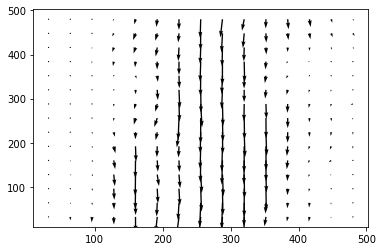

In [8]:
plt.quiver(x,y,u2,-v2,scale=10)

In [9]:
# Invalid velocity vectors are replaced with a weighted average of neighbouring elements 
# that are not valid themselves. For the local mean method the kernel size is used to find
# the weighted average. If the surrounding elements are not valid then iterations are used 
# upto a point where variation in the region is below a certain threshold 


x, y, u3, v3 = scaling.uniform(x, y, u2,
                               v2,
                               scaling_factor = 1)


# field_shape = pyprocess.get_field_shape(image_size=frame_a.shape,search_area_size=searchsize,overlap=overlap)

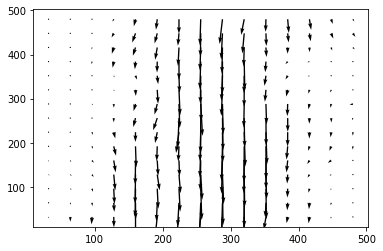

In [10]:
plt.quiver(x,y,u3,-v3)

In [16]:
x,y,u3,v3 = tools.transform_coordinates(x,y,u3,v3)
tools.save(x, y, u3, v3, mask, 'exp1_001.txt' )
# saves flow field in an ascii file, masks invalid vectors

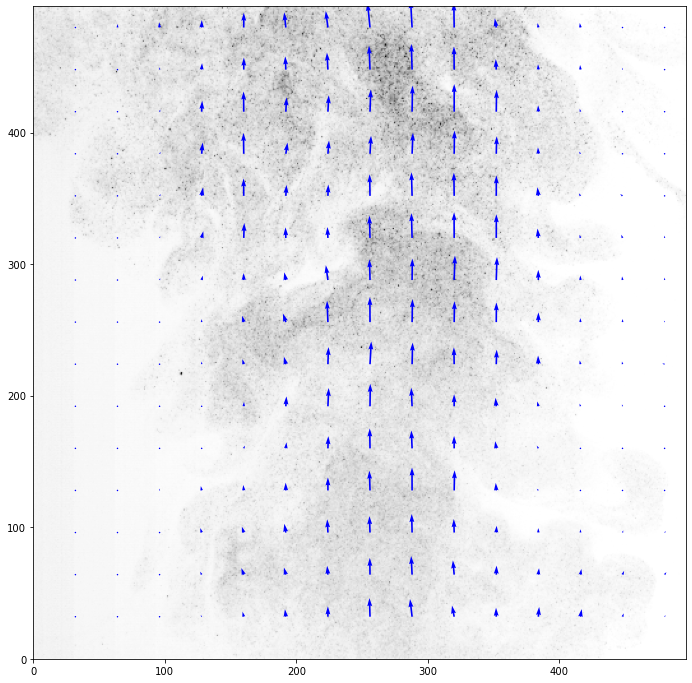

In [25]:
fig, ax = plt.subplots(figsize=(12,12))
tools.display_vector_field('exp1_001.txt', ax=ax, 
                           scaling_factor=1,
                           scale=20,
                           width=0.0025, 
                           on_img=True, 
                           # image_name='/home/antariksh/Downloads/C/c001a.bmp'
                           image_name='/home/user/Downloads/Jet_PIV_Challenge_Case_C/c001a.bmp');

# print("\n Mask :=>",mask)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
orr = []
xi = []
for i in range(0,12):
    xi.append(x[0][i])
ha = []
for i in range(0,12):
    ha.append(round(y[i][0],4))
    for j in range(0,12):
        orr.append(math.sqrt(u3[i][j]*u3[i][j] + v3[i][j]*v3[i][j])) 

        #vector addition of the horizontal and vertical component of velocity
    print("\n Vertical location (pixels) :=>",ha[i])
    plt.plot(xi,orr)
    plt.vlines(xi,0,orr)
    plt.xlabel('Horizontal location (pixels)', fontsize = 20)
    plt.ylabel('Total velocity(pixels/second)', fontsize = 20)
    orr = []
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import axes3d

orr = np.empty([12,12], order='C')

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')

for i in range(0,12):
    for j in range(0,12):
        orr[i][j] = (math.sqrt(u3[i][j]*u3[i][j] + v3[i][j]*v3[i][j]))

    
ax.plot_wireframe(x, y, orr)
    

ax.set_xlabel('Horizontal location (pixels)')
ax.set_ylabel('Vertical location (pixels)')
ax.set_zlabel('Total velocity(pixels/second)')

plt.show()